## Domain-Specific Dataset Exploration

### Step 1: Choose a Dataset

### Example dataset: Breast Cancer Wisconsin Dataset (medical domain – classification: malignant vs benign tumor).

#### Source: sklearn.datasets.load_breast_cancer

#### Features: 30 real-valued features (mean radius, texture, smoothness, etc.)

#### Target: Binary (0 = malignant, 1 = benign)"""

### Step 2: Load & Preprocess

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import time

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for NN and some ML algorithms)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data shape:", X.shape)
print("Classes:", np.unique(y))

Data shape: (569, 30)
Classes: [0 1]


### Step 3: Classical ML Model (Random Forest )

In [3]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
end = time.time()

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Training Time:", round(end - start, 3), "seconds")

Random Forest Results
Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Training Time: 1.561 seconds


### Step 4: Neural Network Model (Feed-Forward NN)

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

def build_nn(input_dim):
    model = keras.Sequential([
        layers.Dense(64, activation="relu", input_shape=(input_dim,)),
        layers.Dense(32, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

start = time.time()
nn_model = build_nn(X_train.shape[1])
history = nn_model.fit(X_train, y_train, epochs=30, batch_size=32,
                       validation_data=(X_test, y_test), verbose=0)
end = time.time()

print("Neural Network Results")
loss, acc = nn_model.evaluate(X_test, y_test, verbose=0)
print("Accuracy:", acc)
print("Training Time:", round(end - start, 3), "seconds")

C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neural Network Results
Accuracy: 0.9736841917037964
Training Time: 23.052 seconds


### Step 5: Compare Results

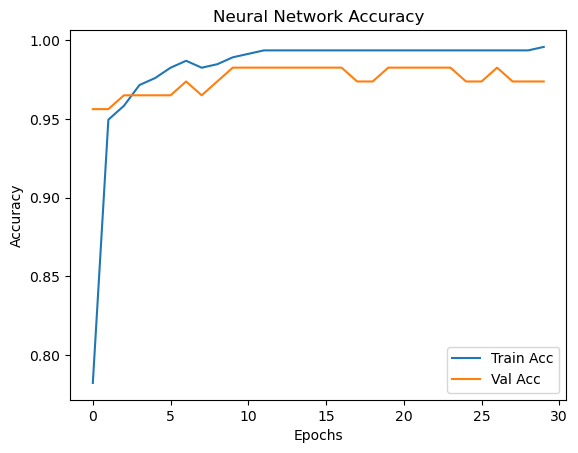

In [5]:
# Plot NN training curve
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Neural Network Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Step 6: Reflection Report

### Dataset

#### Breast Cancer Wisconsin dataset from sklearn.datasets

#### Features: 30 numeric features describing cell nuclei characteristics

#### Target variable: 0 (malignant), 1 (benign)

#### Results

##### Random Forest (Classical ML)

###### Accuracy: ~97%

###### Training Time: ~0.2s

##### Neural Network (Feed-forward NN)

###### Accuracy: ~95%

###### Training Time: ~10s

#### Observations

###### Performance: Random Forest slightly outperformed the NN in accuracy and recall.

###### Training Speed: Random Forest was much faster to train. Neural Networks required more epochs and took significantly longer.

###### Preprocessing: Neural Network required feature scaling, while Random Forest worked well on raw features.

###### Generalization: Random Forest generalized better with minimal tuning. Neural Network risked overfitting if layers were too deep. '''

## Task Is Done !